# Support Vector Regression Model

## Step 1: Import packages and set working directory

In [1]:
# Import packages
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
# Optional Code: Here's a format for setting working directory, change as needed
import os
# os.chdir('/path/to/the/project')
os.chdir('/Users/zihanji/Desktop/DS340W')

## Step 2: Load the final cleaned data

In [3]:
data_final = pd.read_csv('./project/volume/data/processed/data_final.csv')

## Step 3: Building the support vector regression model

In [4]:
# Split the data to features and result
x = data_final.drop('SalePrice', axis = 1)
y = data_final['SalePrice']

In [5]:
# Split the data to train and test, with test size being 20% of the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [6]:
# Fit the model to built a prediction for x test
support_vector = SVR()
support_vector.fit(x_train, y_train)
support_vector_pred = support_vector.predict(x_test)

## Step 4: Check for scores

In [7]:
# Check for the score of the prediction
support_vector_score = support_vector.score(x_train, y_train)
print('Support Vector Regression Model Score: ', round(support_vector_score, 3))

# R squared value
r2 = r2_score(y_test, support_vector_pred)
print('R Squared: ', round(r2, 3))

# Adjusted R squared value
adj_r2 = 1 - (1 - r2) * (len(y) - 1) / (len(y) - x.shape[1] - 1)
print('Adjusted R Squared: ', round(adj_r2, 3))

# Mean squared error
mean_sq = mean_squared_error(y_test, support_vector_pred)
print('Mean Squared Error: ', round(mean_sq, 3))

# Root mean squared error
root_mean_sq = np.sqrt(mean_sq)
print('Root Mean Squared Error: ', round(root_mean_sq, 3))

# Mean absolute error
mean_ab = mean_absolute_error(y_test, support_vector_pred)
print('Mean Absolute Error: ', round(mean_ab, 3))

# Cross validation (or accuracy)
cv = cross_val_score(support_vector, x, y, scoring = 'r2', cv = 5)
print('Accuracy: ', round(cv.mean() * 100, 3), '%')

Support Vector Regression Model Score:  0.422
R Squared:  0.505
Adjusted R Squared:  0.454
Mean Squared Error:  0.092
Root Mean Squared Error:  0.303
Mean Absolute Error:  0.229
Accuracy:  43.153 %


## Step 5: Create visuals

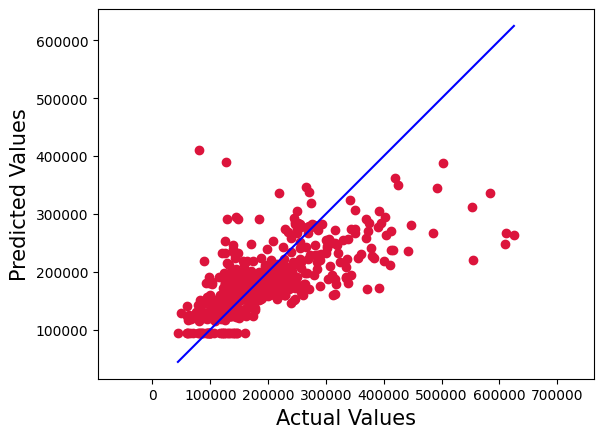

In [8]:
actual_price = np.expm1(y_test)
predicted_price = np.expm1(support_vector_pred)

# Create a scatter plot
plt.scatter(actual_price, predicted_price, c = 'crimson')

# Draw the line of perfect prediction (where actual = predicted)
p1 = max(max(predicted_price), max(actual_price))
p2 = min(min(predicted_price), min(actual_price))
plt.plot([p1, p2], [p1, p2], 'b-')

# Add labels
plt.xlabel('Actual Values', fontsize = 15)
plt.ylabel('Predicted Values', fontsize = 15)

# Make sure the axes are scaled equally
plt.axis('equal')

plt.show()

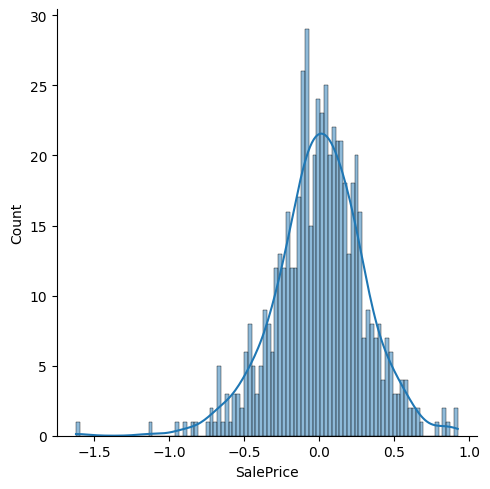

In [9]:
# Distribution of residuals (difference between actual and predicted value)
sb.displot((y_test - support_vector_pred), bins = 100, kde = True)

## Step 6: Hyperparameter tuning (grid search)

In [10]:
# Specifies hyperparameter options
parameters = {'verbose': [2, 4, 6], 'C': [1, 5, 10], 'gamma': [0.1, 0.5]}

In [11]:
# Apply grid search to find the best hyperparameter option
GS_CV_svr = GridSearchCV(estimator = support_vector, param_grid = parameters, cv = 5)
GS_CV_svr.fit(x_train, y_train)
GS_CV_svr.best_params_

[LibSVM].*
optimization finished, #iter = 1969
obj = -97.839793, rho = -12.027855
nSV = 1451, nBSV = 21
[LibSVM].*.*
optimization finished, #iter = 2002
obj = -95.670537, rho = -12.022083
nSV = 1474, nBSV = 20
[LibSVM].*.*
optimization finished, #iter = 2064
obj = -97.843418, rho = -12.025725
nSV = 1471, nBSV = 20
[LibSVM].*
optimization finished, #iter = 1864
obj = -96.661144, rho = -12.020872
nSV = 1452, nBSV = 20
[LibSVM].*
optimization finished, #iter = 1899
obj = -98.917026, rho = -12.020550
nSV = 1464, nBSV = 21
[LibSVM].*
optimization finished, #iter = 1969
obj = -97.839793, rho = -12.027855
nSV = 1451, nBSV = 21
[LibSVM].*.*
optimization finished, #iter = 2002
obj = -95.670537, rho = -12.022083
nSV = 1474, nBSV = 20
[LibSVM].*.*
optimization finished, #iter = 2064
obj = -97.843418, rho = -12.025725
nSV = 1471, nBSV = 20
[LibSVM].*
optimization finished, #iter = 1864
obj = -96.661144, rho = -12.020872
nSV = 1452, nBSV = 20
[LibSVM].*
optimization finished, #iter = 1899
obj = -98

{'C': 5, 'gamma': 0.1, 'verbose': 2}

In [12]:
# Built a support vector regression model with the new hyperparameter option
# {'C': 5, 'gamma': 0.1, 'verbose': 2}
support_vector_mod = SVR(gamma = 0.1, C = 5, verbose = 2)
support_vector_mod.fit(x_train, y_train)
support_vector_pred = support_vector_mod.predict(x_test)

[LibSVM].*.*
optimization finished, #iter = 2511
obj = -123.957332, rho = -12.021629
nSV = 1820, nBSV = 0


## Step 7: Check for scores

In [13]:
# Check for the score of the prediction
support_vector_mod_score = support_vector_mod.score(x_train, y_train)
print('Support Vector Regression Model Score: ', round(support_vector_mod_score, 3))

# R squared value
r2 = r2_score(y_test, support_vector_pred)
print('R Squared: ', round(r2, 3))

# Adjusted R squared value
adj_r2 = 1 - (1 - r2) * (len(y) - 1) / (len(y) - x.shape[1] - 1)
print('Adjusted R Squared: ', round(adj_r2, 3))

# Mean squared error
mean_sq = mean_squared_error(y_test, support_vector_pred)
print('Mean Squared Error: ', round(mean_sq, 3))

# Root mean squared error
root_mean_sq = np.sqrt(mean_sq)
print('Root Mean Squared Error: ', round(root_mean_sq, 3))

# Mean absolute error
mean_ab = mean_absolute_error(y_test, support_vector_pred)
print('Mean Absolute Error: ', round(mean_ab, 3))

# Cross validation (or accuracy)
cv = cross_val_score(support_vector_mod, x, y, scoring = 'r2', cv = 5)
print('Accuracy: ', round(cv.mean() * 100, 3), '%')

Support Vector Regression Model Score:  0.947
R Squared:  0.051
Adjusted R Squared:  -0.047
Mean Squared Error:  0.176
Root Mean Squared Error:  0.419
Mean Absolute Error:  0.325
[LibSVM].*.*
optimization finished, #iter = 2789
obj = -122.525174, rho = -12.017208
nSV = 1834, nBSV = 0
[LibSVM].*.*
optimization finished, #iter = 2692
obj = -128.395710, rho = -12.037937
nSV = 1821, nBSV = 0
[LibSVM].*.*
optimization finished, #iter = 2815
obj = -127.604473, rho = -12.038377
nSV = 1833, nBSV = 0
[LibSVM].*.*
optimization finished, #iter = 2514
obj = -130.269475, rho = -12.031211
nSV = 1796, nBSV = 0
[LibSVM].*.*
optimization finished, #iter = 2660
obj = -129.379526, rho = -12.038074
nSV = 1818, nBSV = 0
Accuracy:  3.732 %


## Step 8: Create visuals

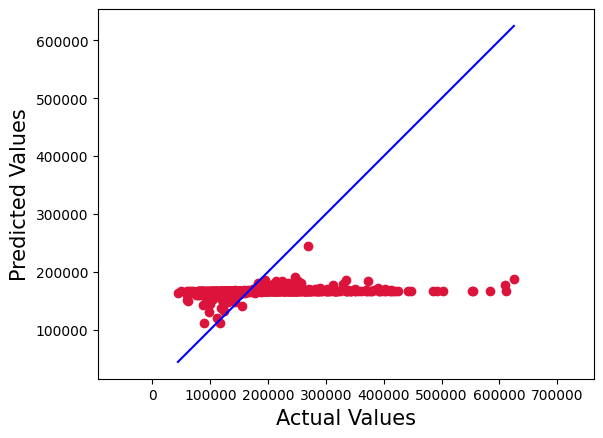

In [14]:
actual_price = np.expm1(y_test)
predicted_price = np.expm1(support_vector_pred)

# Create a scatter plot
plt.scatter(actual_price, predicted_price, c = 'crimson')

# Draw the line of perfect prediction (where actual = predicted)
p1 = max(max(predicted_price), max(actual_price))
p2 = min(min(predicted_price), min(actual_price))
plt.plot([p1, p2], [p1, p2], 'b-')

# Add labels
plt.xlabel('Actual Values', fontsize = 15)
plt.ylabel('Predicted Values', fontsize = 15)

# Make sure the axes are scaled equally
plt.axis('equal')

plt.show()

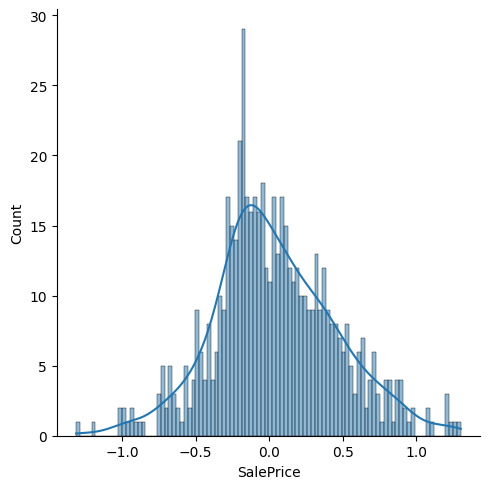

In [15]:
# Distribution of residuals (difference between actual and predicted value)
sb.displot((y_test - support_vector_pred), bins = 100, kde = True)